/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1

[nan nan]
[ 0.00222713 -1.0018821 ]
[ 0.00072077 -0.6502732 ]
[ 0.00088586 -0.63805154]


/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


[-0.00169141  0.55914661]
[-0.00662714  2.49723906]


/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/home/jbuist/git/phy230/motion_tracking/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1

[nan nan]
[-0.00706632  2.621812  ]


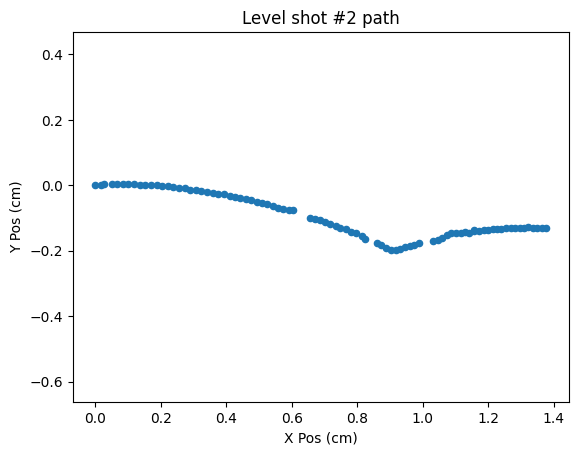

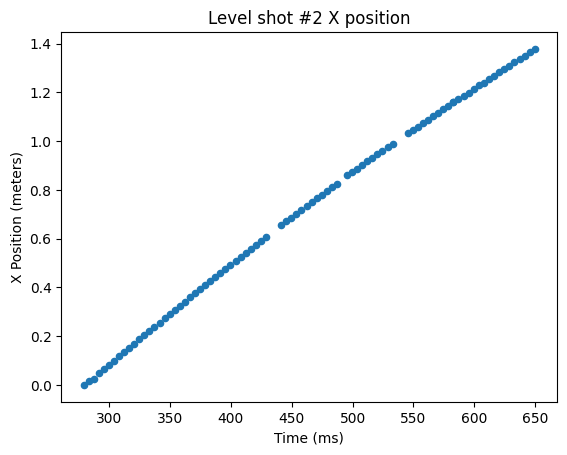

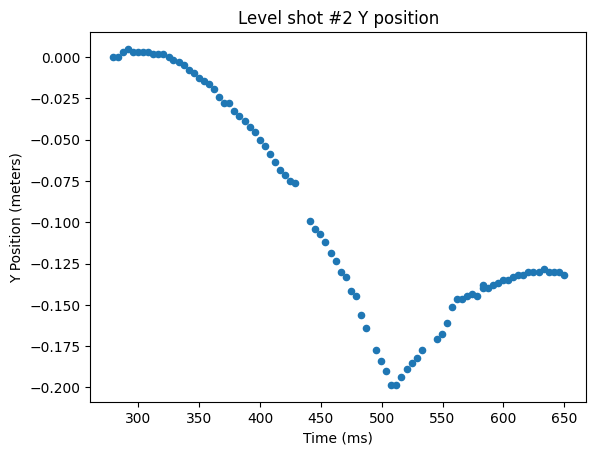

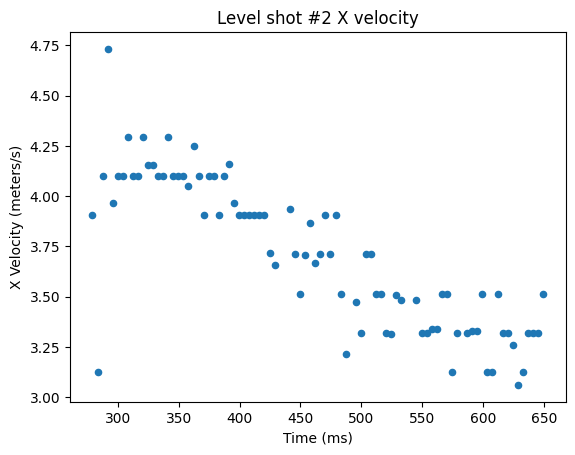

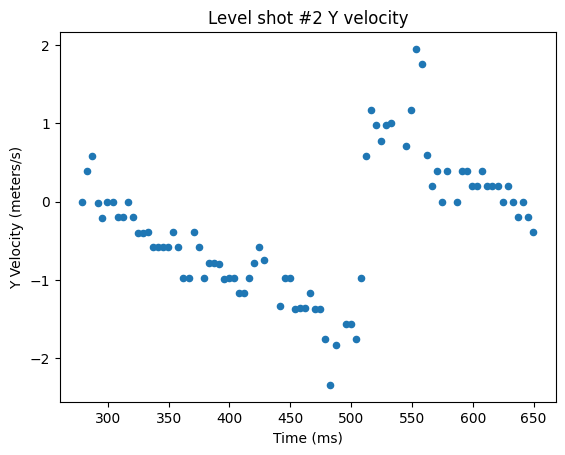

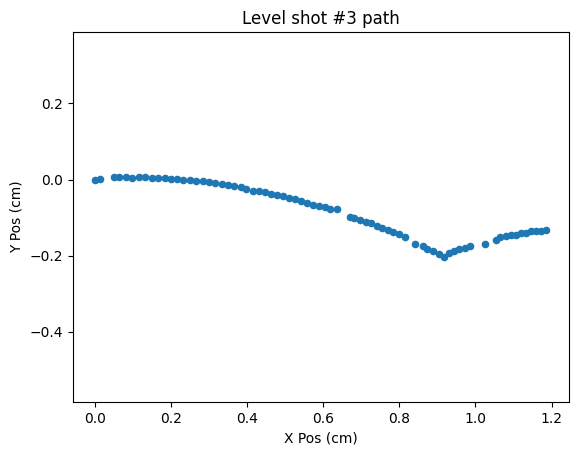

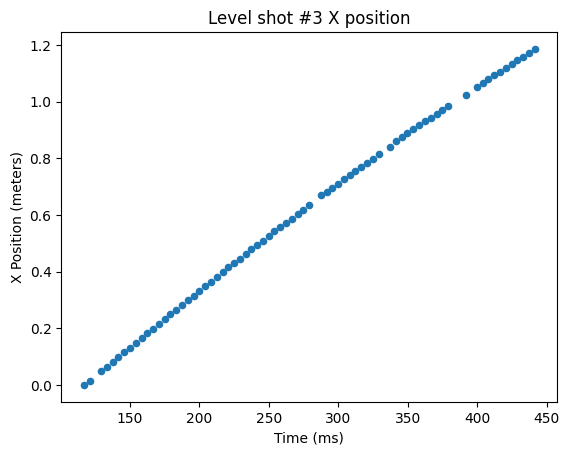

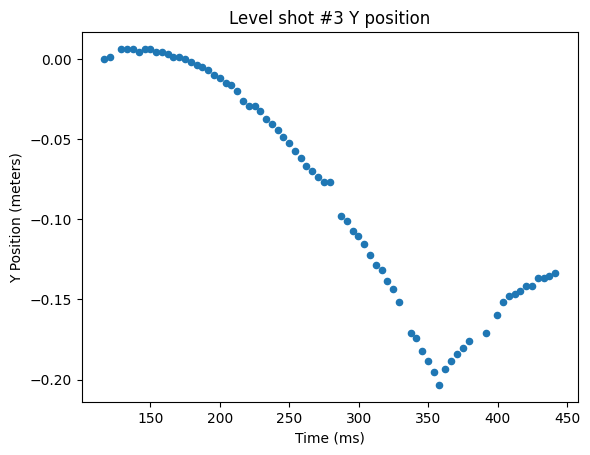

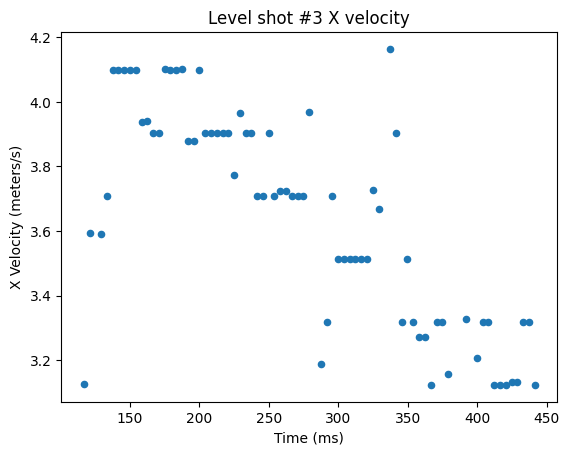

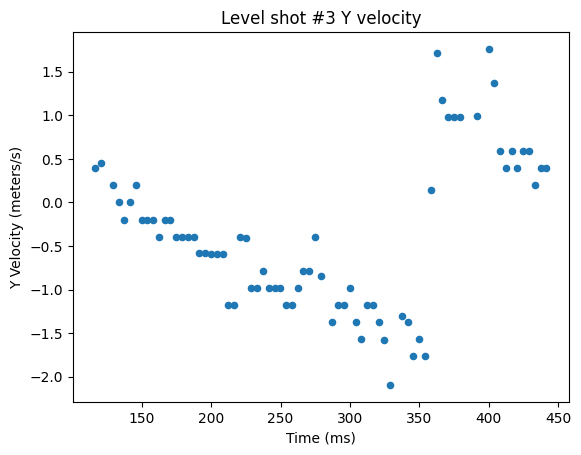

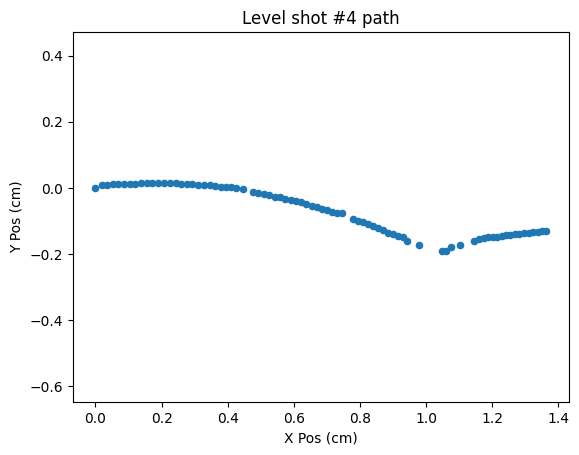

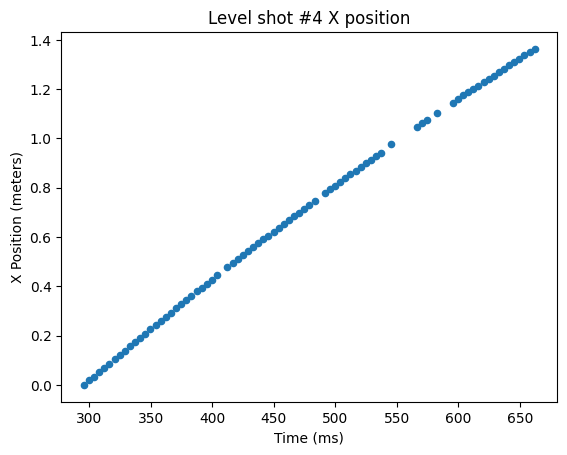

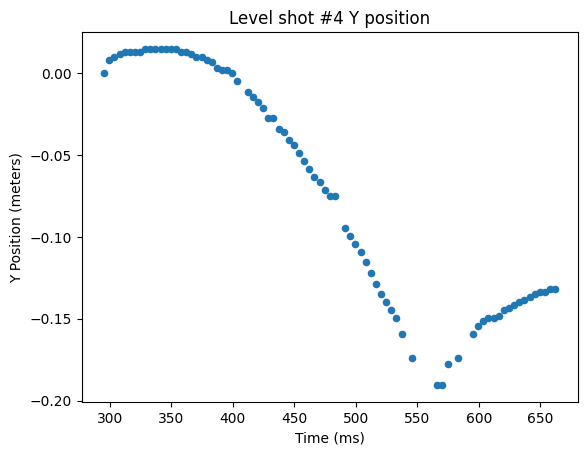

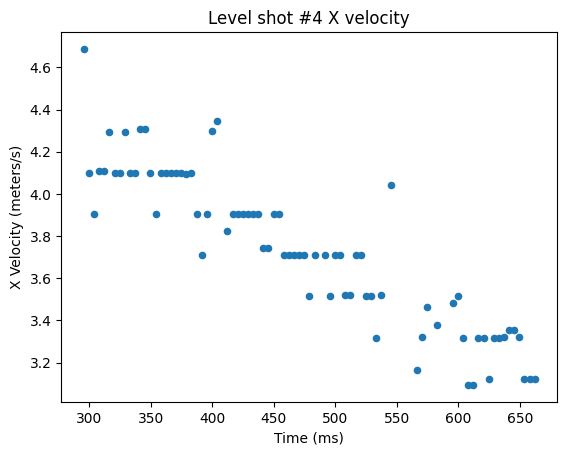

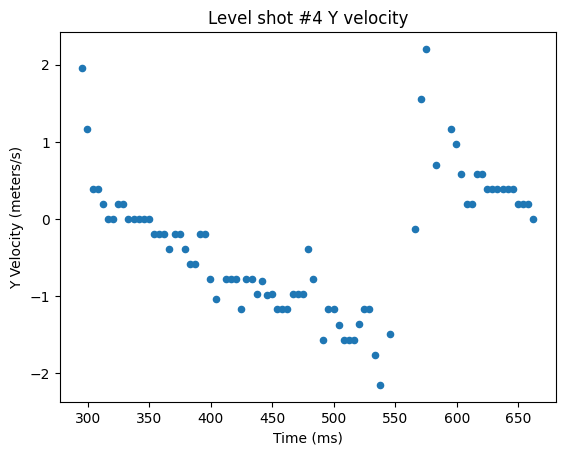

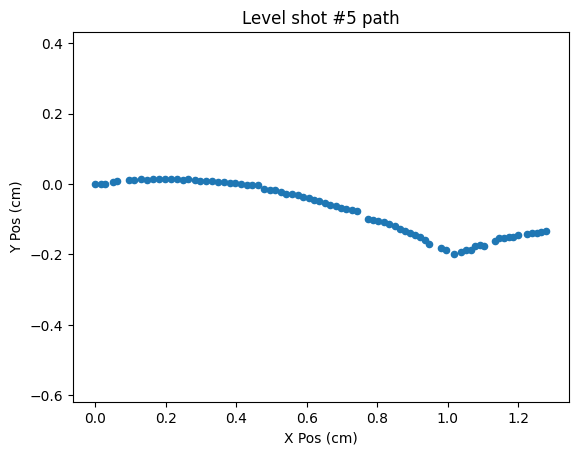

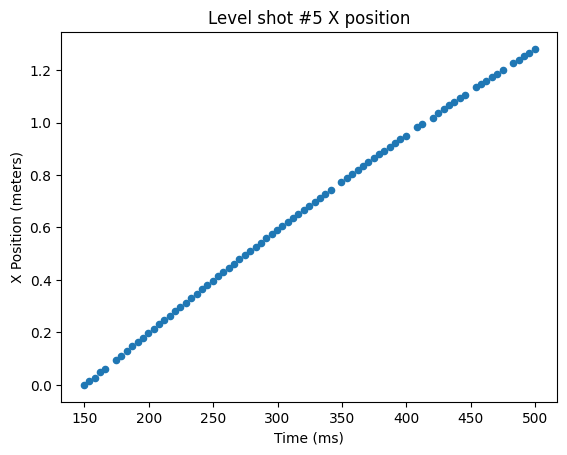

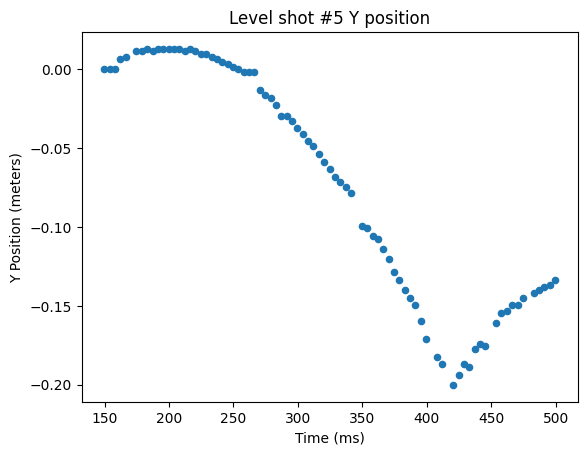

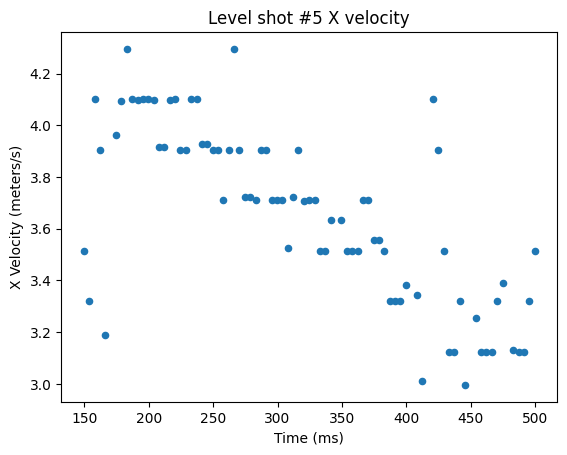

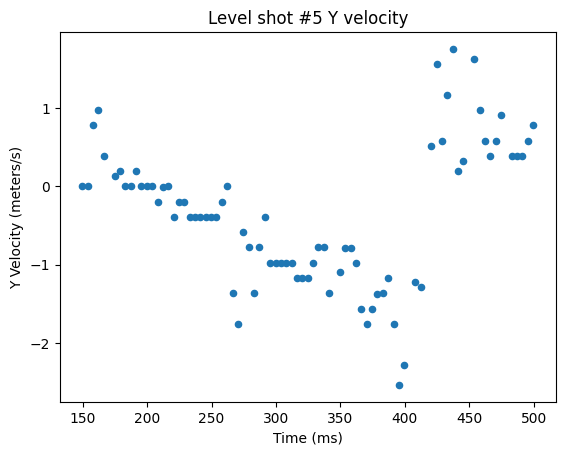

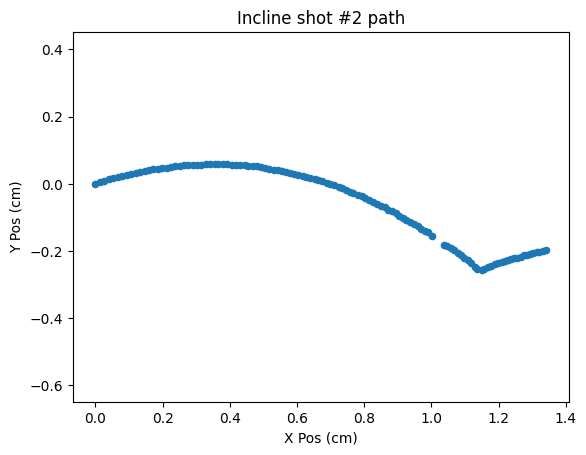

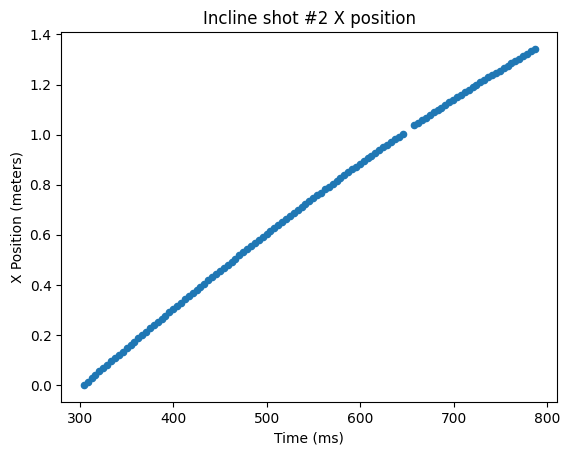

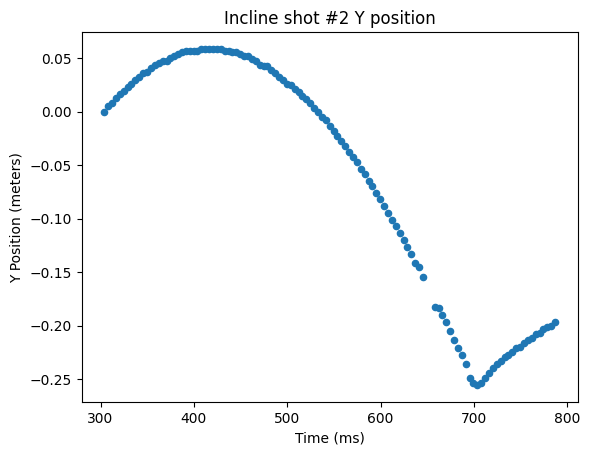

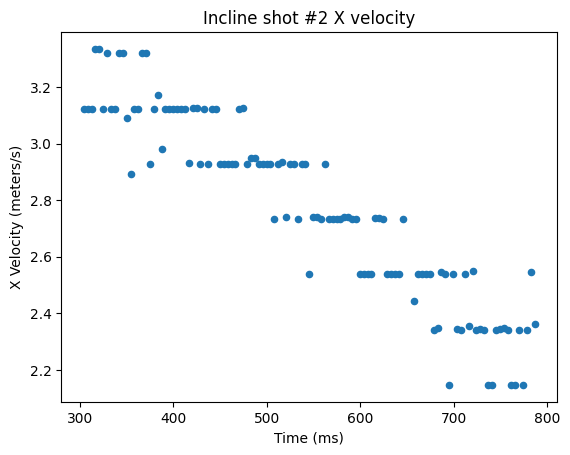

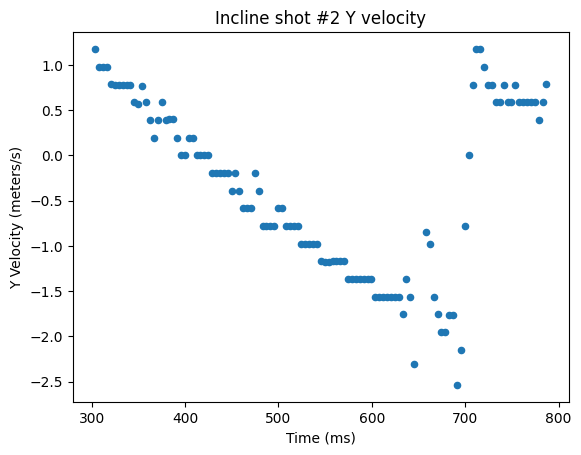

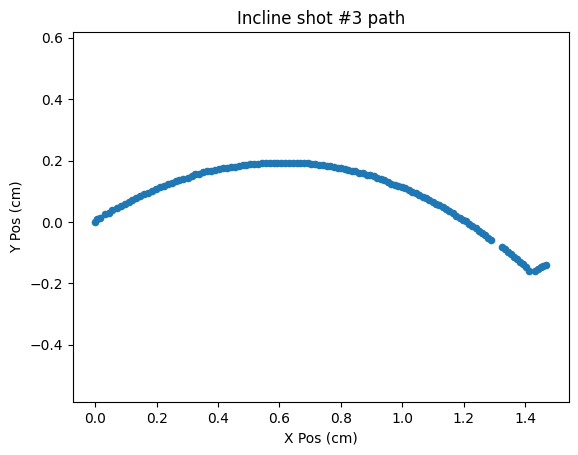

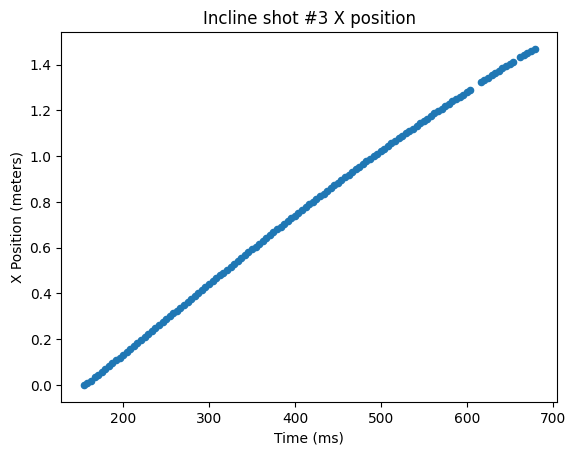

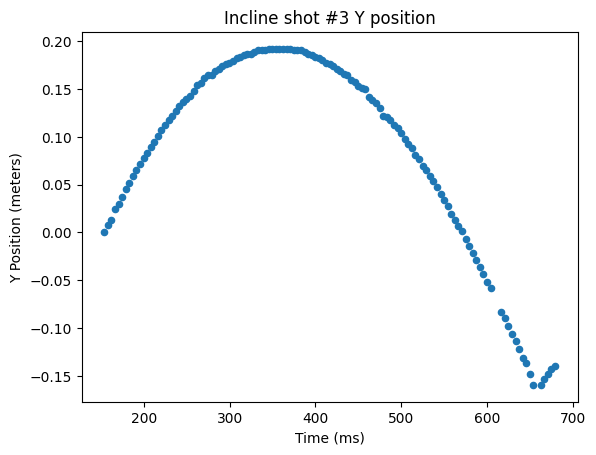

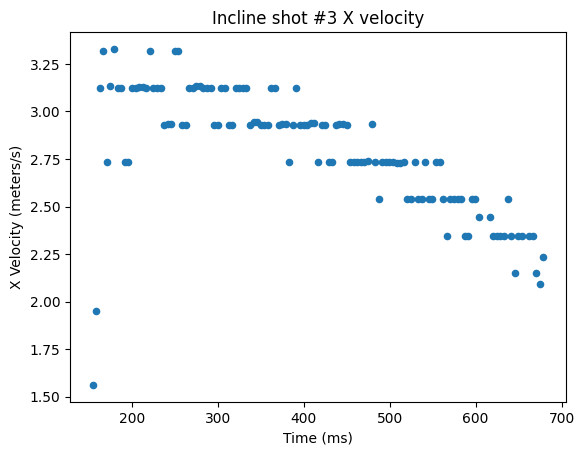

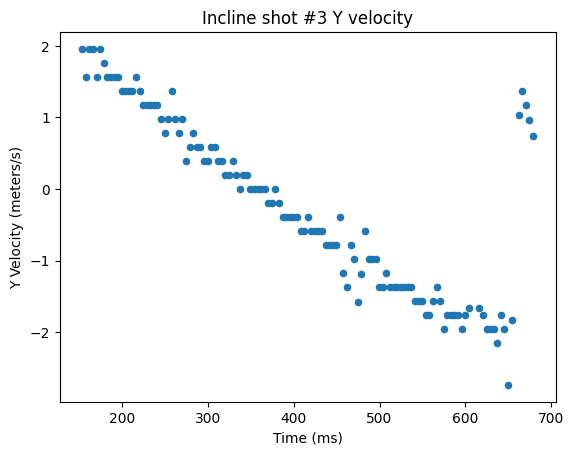

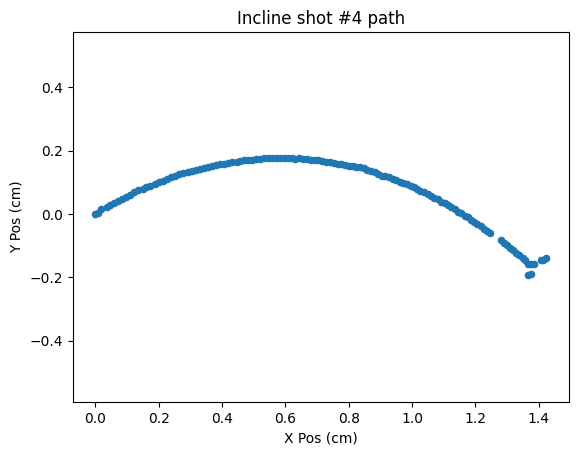

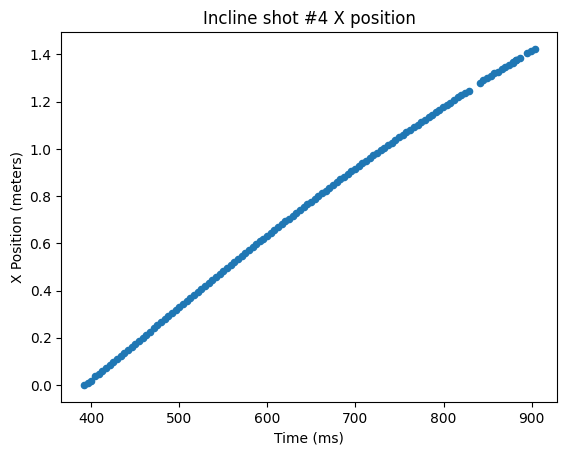

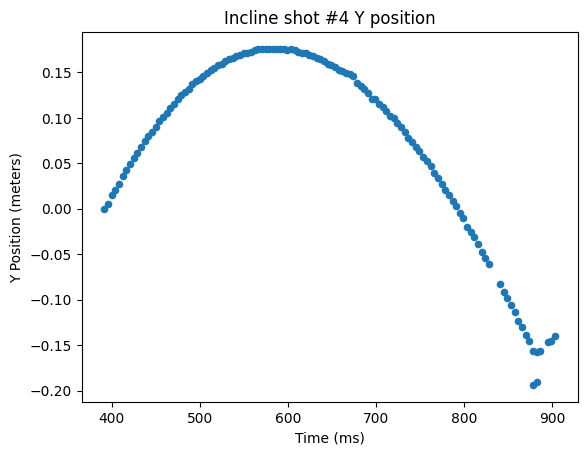

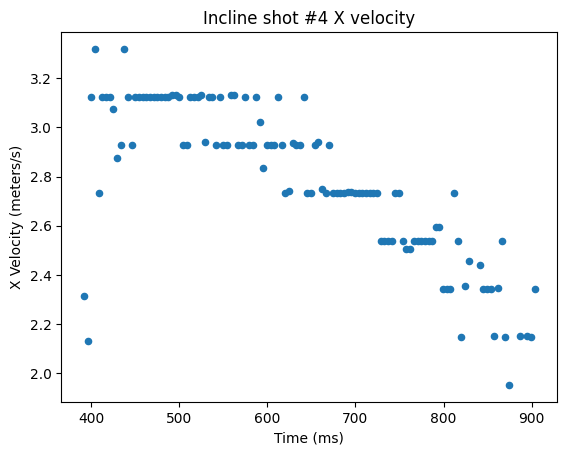

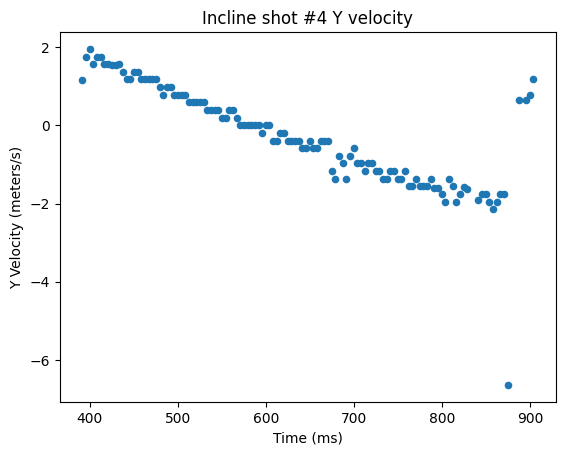

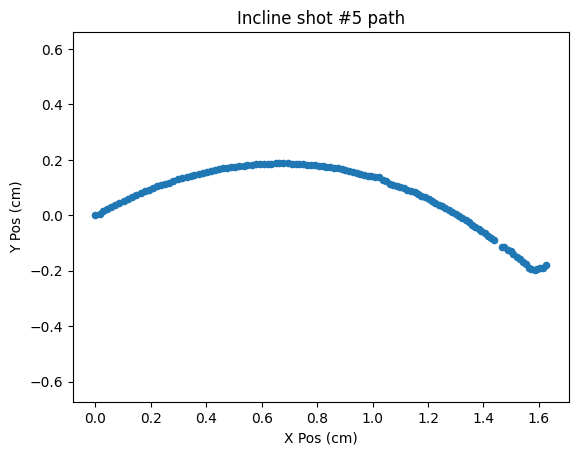

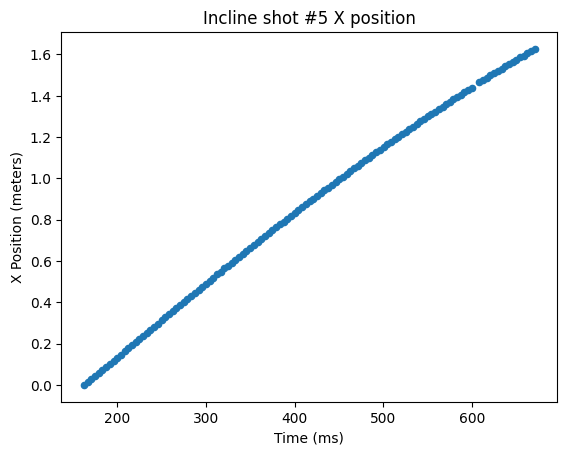

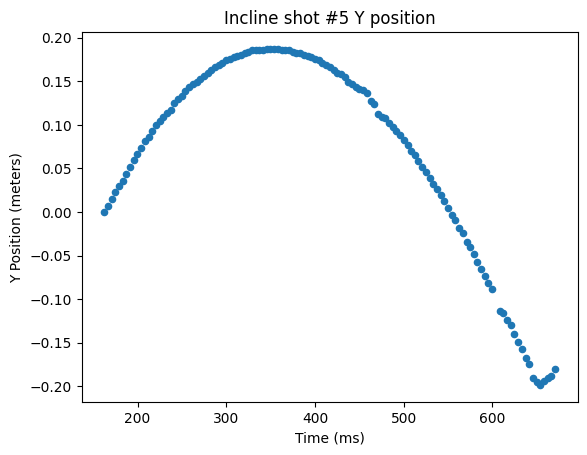

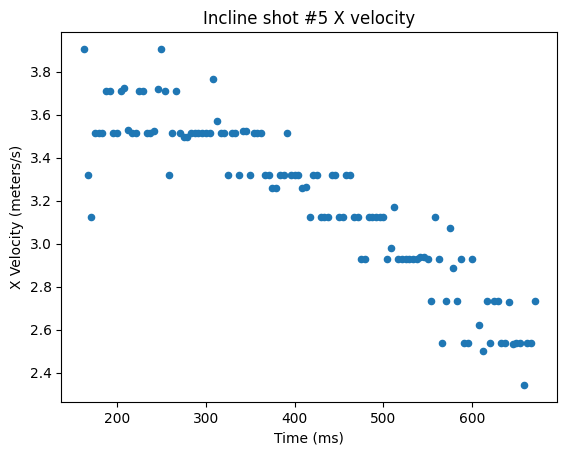

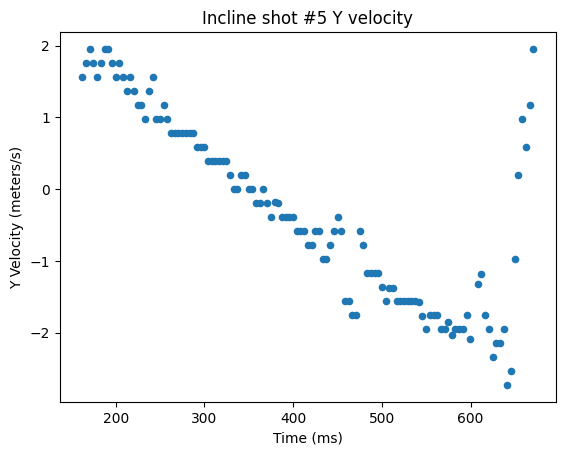

In [6]:
import pandas as pd
import numpy as np

for test_type in ['level', 'incline']:
    for x in [1, 2, 3, 4]:
        infile = f'/home/jbuist/git/phy230/ballshot/trimmed/{test_type}{x}.csv'
        if x == 4 and test_type == 'incline':
            infile = f'/home/jbuist/git/phy230/ballshot/trimmed/{test_type}5.csv'
        df = pd.read_csv(infile)
        df['xvel'] = np.gradient(df.xpos, df.seconds)
        df['yvel'] = np.gradient(df.ypos, df.seconds)
        tt = test_type.capitalize()

        df.plot.scatter(x='xpos', y='ypos', legend=False,
                        title=f'{tt} shot #{x+1} path',
                        ylabel='Y Pos (cm)', xlabel='X Pos (cm)').axis('equal')

        df.plot.scatter(x='ms', y='xpos', legend=False,
                        title=f'{tt} shot #{x+1} X position',
                        ylabel='X Position (meters)', xlabel='Time (ms)').get_figure().savefig(f'{test_type}{+1}_xpos.png')

        df.plot.scatter(x='ms', y='ypos', legend=False,
                        title=f'{tt} shot #{x+1} Y position',
                        ylabel='Y Position (meters)', xlabel='Time (ms)').get_figure().savefig(f'{test_type}{+1}_ypos.png')
        
        df.plot.scatter(x='ms', y='xvel', legend=False,
                        title=f'{tt} shot #{x+1} X velocity',
                        ylabel='X Velocity (meters/s)', xlabel='Time (ms)').get_figure().savefig(f'{test_type}{+1}_xvel.png')

        df.plot.scatter(x='ms', y='yvel', legend=False,
                        title=f'{tt} shot #{x+1} Y velocity',
                        ylabel='Y Velocity (meters/s)', xlabel='Time (ms)').get_figure().savefig(f'{test_type}{+1}_yvel.png')


In [3]:
df.seconds

0      0.162394
1      0.166561
2      0.170728
3      0.174894
4      0.179061
         ...   
117    0.653958
118    0.658126
119    0.662293
120    0.666458
121    0.670626
Name: seconds, Length: 122, dtype: float64

In [4]:
df.diff().head()

,Unnamed: 0,screenx,screeny,ms,seconds,xpos,ypos,xvel,yvel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,10.0,4.0,4.166667,0.004167,0.016270,0.006508,-5.857143e-01,0.195238
2,1.0,7.0,5.0,4.166667,0.004167,0.011389,0.008135,-1.952381e-01,0.195238
3,1.0,9.0,5.0,4.166667,0.004167,0.014643,0.008135,3.904762e-01,-0.195238
4,1.0,9.0,4.0,4.166667,0.004167,0.014643,0.006508,-5.817569e-14,-0.195238
